<a href="https://colab.research.google.com/github/mgrover1/atms_597_project4/blob/master/Project_4_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Read in the Data

Import packages

In [0]:

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from math import sqrt

from sklearn import preprocessing

Pull in files from data processing and mount drive

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# The following files just have shortened columns, variables have been changed into metric, footers removed
GFS = pd.read_csv('drive/My Drive/ATMS_597_Project_4/GFS_Daily_Tidy.csv', index_col = 'Date', usecols = ['Date', 'TMAX', 'TMIN', 'WMAX', 'RTOT'], parse_dates = True)

hr_obs = pd.read_csv('drive/My Drive/ATMS_597_Project_4/CMI_Hourly_Tidy.csv', index_col = 'Timestamp', parse_dates = True)
hr_obs.index = hr_obs.index + pd.DateOffset(hours=12)  

daily_obs = pd.read_csv('drive/My Drive/ATMS_597_Project_4/CMI_Daily_Tidy.csv', index_col = 'Date', parse_dates = True)
daily_obs.index = daily_obs.index + pd.DateOffset(hours=12)  



In [0]:
# Merge and drop all days with missing values 
Merge_File = pd.merge(daily_obs.reset_index(), GFS.reset_index(), on = 'Date', how = 'inner')
Merge_File = pd.merge(Merge_File, hr_obs.reset_index(), left_on = 'Date', right_on = 'Timestamp', how = 'inner').drop(columns = 'Timestamp')

Merge_File.dropna(inplace = True)  # Remove Nans

In [0]:
Merge_File #Check the file

,Date,Max Hourly Temp (C),Min Hourly Temp (C),Max Wind Speed (m/s),Daily Precip (mm),TMAX,TMIN,WMAX,RTOT,tmpc,dwpc,mslp,wdir,wspd,skct,pr1h
0,2010-01-01 12:00:00,-11.111111,-16.666667,6.70560,0.0,-11.26,-16.46,7.323933,0.05,-1.975000,-4.183333,1018.208333,279.166667,6.183333,6.000000,0.000
1,2010-01-02 12:00:00,-14.444444,-20.555556,6.70560,0.0,-10.16,-15.96,4.687217,0.00,-13.325000,-16.933333,1029.316667,286.666667,5.591667,2.250000,0.000
2,2010-01-03 12:00:00,-12.222222,-21.111111,4.91744,0.0,-9.96,-14.36,5.941380,0.06,-16.525000,-19.816667,1032.991667,296.666667,4.633333,0.000000,0.000
3,2010-01-04 12:00:00,-11.666667,-18.888889,8.94080,0.0,-8.46,-12.86,5.685068,0.17,-15.325000,-19.858333,1032.250000,305.833333,3.641667,0.000000,0.000
4,2010-01-05 12:00:00,-12.222222,-18.333333,7.15264,0.0,-7.16,-11.06,3.794733,0.77,-14.441667,-17.700000,1028.141667,290.833333,6.300000,1.333333,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3608,2019-12-26 12:00:00,16.666667,7.777778,8.04672,0.0,11.84,3.84,4.301163,0.00,10.600000,6.075000,1014.266667,185.000000,5.758333,0.000000,0.000
3609,2019-12-27 12:00:00,6.111111,0.000000,6.70560,0.0,13.94,3.54,8.819297,2.73,13.466667,11.141667,1016.258333,200.833333,6.125000,1.090909,0.000
3610,2019-12-28 12:00:00,13.333333,0.000000,10.28192,0.0,15.94,9.34,9.701546,11.58,2.816667,0.725000,1025.341667,242.500000,2.775000,0.666667,0.000
3611,2019-12-29 12:00:00,15.000000,5.000000,10.28192,6.1,7.24,-1.66,11.111256,2.57,7.141667,6.866667,1018.491667,105.833333,5.975000,9.000000,0.000


In [0]:
Merge_File['day'] = Merge_File['Date'].dt.day
Merge_File['month'] = Merge_File['Date'].dt.month
Merge_File['year'] = Merge_File['Date'].dt.year

In [0]:
#Pull out the variables that are needed
Condense_file = Merge_File.drop(columns =['Date', 'Max Hourly Temp (C)', 'Min Hourly Temp (C)', 'Max Wind Speed (m/s)', 'Daily Precip (mm)'], axis = 1)
New_condensed_date_file = Merge_File.drop(columns = ['Max Hourly Temp (C)', 'Min Hourly Temp (C)', 'Max Wind Speed (m/s)', 'Daily Precip (mm)'], axis = 1)
Condense_file_list = list(Condense_file.columns)
Merge_File

,Date,Max Hourly Temp (C),Min Hourly Temp (C),Max Wind Speed (m/s),Daily Precip (mm),TMAX,TMIN,WMAX,RTOT,tmpc,dwpc,mslp,wdir,wspd,skct,pr1h,day,month,year
0,2010-01-01 12:00:00,-11.111111,-16.666667,6.70560,0.0,-11.26,-16.46,7.323933,0.05,-1.975000,-4.183333,1018.208333,279.166667,6.183333,6.000000,0.000,1,1,2010
1,2010-01-02 12:00:00,-14.444444,-20.555556,6.70560,0.0,-10.16,-15.96,4.687217,0.00,-13.325000,-16.933333,1029.316667,286.666667,5.591667,2.250000,0.000,2,1,2010
2,2010-01-03 12:00:00,-12.222222,-21.111111,4.91744,0.0,-9.96,-14.36,5.941380,0.06,-16.525000,-19.816667,1032.991667,296.666667,4.633333,0.000000,0.000,3,1,2010
3,2010-01-04 12:00:00,-11.666667,-18.888889,8.94080,0.0,-8.46,-12.86,5.685068,0.17,-15.325000,-19.858333,1032.250000,305.833333,3.641667,0.000000,0.000,4,1,2010
4,2010-01-05 12:00:00,-12.222222,-18.333333,7.15264,0.0,-7.16,-11.06,3.794733,0.77,-14.441667,-17.700000,1028.141667,290.833333,6.300000,1.333333,0.000,5,1,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3608,2019-12-26 12:00:00,16.666667,7.777778,8.04672,0.0,11.84,3.84,4.301163,0.00,10.600000,6.075000,1014.266667,185.000000,5.758333,0.000000,0.000,26,12,2019
3609,2019-12-27 12:00:00,6.111111,0.000000,6.70560,0.0,13.94,3.54,8.819297,2.73,13.466667,11.141667,1016.258333,200.833333,6.125000,1.090909,0.000,27,12,2019
3610,2019-12-28 12:00:00,13.333333,0.000000,10.28192,0.0,15.94,9.34,9.701546,11.58,2.816667,0.725000,1025.341667,242.500000,2.775000,0.666667,0.000,28,12,2019
3611,2019-12-29 12:00:00,15.000000,5.000000,10.28192,6.1,7.24,-1.66,11.111256,2.57,7.141667,6.866667,1018.491667,105.833333,5.975000,9.000000,0.000,29,12,2019


## Create and Compare Models

### Linear Regression for **Maximum Temperature**

In [0]:
#Linear Regression for TMAX
testing_dates = np.array(New_condensed_date_file.query('year == 2019')['Date'])
training_verification = np.array(Merge_File.query('year < 2019')['Max Hourly Temp (C)'])
testing_verification = np.array(Merge_File.query('year == 2019')['Max Hourly Temp (C)'])


Import sklearn and set up the model for the TMAX regression

In [0]:
# Import and set up the model
from sklearn.linear_model import LinearRegression
lrmax = LinearRegression(fit_intercept=True)

column_names = ['TMAX','TMIN','tmpc'] # Columns for regression
train_vars = Condense_file.query('year < 2019')[column_names] #  training
test_vars = Condense_file.query('year == 2019')[column_names] #  testing

lrmax.fit(train_vars, training_verification) # Fit the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
Predict=lrmax.predict(test_vars) # runs model to get predict for the test period

#print the root mean square error, model slope, and model intercept
#checks the GFS 
print('Baseline Root Mean Square Error:', round(sqrt(mean_squared_error(testing_verification, Condense_file.query('year == 2019')['TMAX'].values)), 2), 'degrees C.')
print('Root Mean Square Error:', round(sqrt(mean_squared_error(testing_verification, Predict)), 2), 'degrees C.')
print("Model slope:    ", lrmax.coef_[0])
print("Model intercept:", lrmax.intercept_)

Baseline Root Mean Square Error: 4.52 degrees C.
Root Mean Square Error: 3.24 degrees C.
Model slope:     0.35495200307720737
Model intercept: 3.9941626236939953


Above print out for TMAX:
 
Baseline Root Mean Square Error: 4.52 degrees C.
Root Mean Square Error: 3.24 degrees C.
Model slope:     0.35495200307720737
Model intercept: 3.9941626236939953

In [0]:
# TMAX
# Make a plot of obs for the test period(dots)  and model predict for the test period  (line)
plt.scatter(testing_dates, testing_verification, c='green')
plt.plot(testing_dates, Predict, c='black')

### Random Forest Regression for **Maximum Temperature**

In [0]:
# Import sklear modules that will help with the model fitting
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Setup random forest parameters

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_TMAX = RandomForestRegressor()

rf_random_TMAX = RandomizedSearchCV(estimator = rf, cv=3, param_distributions = random_grid, n_iter = 100, verbose=2, random_state=42, n_jobs = -1)

rf_random_TMAX.fit(train_vars, training_verification)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 16.7min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [0]:
# Extract the best random forest model
best_random_TMAX = rf_random_TMAX.best_estimator_

# Predict the values
Predict = best_random_TMAX.predict(test_vars)

print('Baseline Root Mean Square Error:', round(sqrt(mean_squared_error(testing_verification, Condense_file.query('year == 2019')['TMAX'].values)), 2), 'degrees C.')
print('Root Mean Square Error:', round(sqrt(mean_squared_error(testing_verification, Predict)), 2), 'degrees C.')

Baseline Root Mean Square Error: 4.52 degrees C.
Root Mean Square Error: 3.28 degrees C.


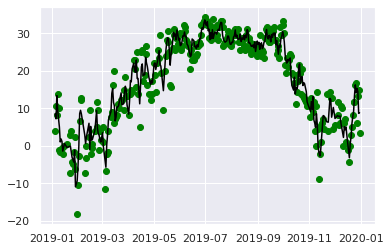

In [0]:
# TMIN Linear Regression
# Make a plot of obs for the test period(dots)  and model predict for the test period  (line)
plt.scatter(testing_dates, testing_verification, c='green')
plt.plot(testing_dates, Predict, c='black')

### Linear Regression for **Minimum Temperature**

In [0]:
# TMIN
# The following will overrite the above regressions
testing_dates = np.array(New_condensed_date_file.query('year == 2019')['Date'])
training_verification = np.array(Merge_File.query('year < 2019')['Min Hourly Temp (C)'])
testing_verification = np.array(Merge_File.query('year == 2019')['Min Hourly Temp (C)'])


In [0]:
lrmin = LinearRegression(fit_intercept=True)

column_names = ['TMAX','TMIN','tmpc'] # Choose the columns 
train_vars = Condense_file.query('year < 2019')[column_names] #  training
test_vars = Condense_file.query('year == 2019')[column_names] #  testing


lrmin.fit(train_vars, training_verification) # Fit the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
Predict=lrmin.predict(test_vars) # runs model to get predict for the test period

#print the root mean square error, model slope, and model intercept
#checks the GFS forecast 
print('Baseline Root Mean Square Error:', round(sqrt(mean_squared_error(testing_verification, Condense_file.query('year == 2019')['TMIN'].values)), 2), 'degrees C.')
print('Root Mean Square Error:', round(sqrt(mean_squared_error(testing_verification, Predict)), 2), 'degrees C.')
print("Model slope:    ", lrmin.coef_[0])
print("Model intercept:", lrmin.intercept_)

Baseline Root Mean Square Error: 4.25 degrees C.
Root Mean Square Error: 3.1 degrees C.
Model slope:     -0.00885765197046887
Model intercept: -3.5722993297758983


Print out for TMIN: 

Baseline Root Mean Square Error: 4.25 degrees C.
Root Mean Square Error: 3.1 degrees C.
Model slope:     -0.00885765197046887
Model intercept: -3.5722993297758983

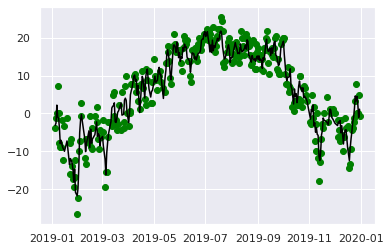

In [0]:
# TMIN Linear Regression
# Make a plot of obs for the test period(dots)  and model predict for the test period  (line)
plt.scatter(testing_dates, testing_verification, c='green')
plt.plot(testing_dates, Predict, c='black')

### Random Forest Regression for **Minimum Temperature**

In [0]:
rf_TMIN = RandomForestRegressor()

rf_random_TMIN = RandomizedSearchCV(estimator = rf, cv=3, param_distributions = random_grid, n_iter = 100, verbose=2, random_state=42, n_jobs = -1)

rf_random_TMIN.fit(train_vars, training_verification)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 16.7min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [0]:
# Extract the best random forest model
best_random_TMIN = rf_random_TMIN.best_estimator_

# Predict the values
Predict = best_random_TMIN.predict(test_vars)

print('Baseline Root Mean Square Error:', round(sqrt(mean_squared_error(testing_verification, Condense_file.query('year == 2019')['TMIN'].values)), 2), 'degrees C.')
print('Root Mean Square Error:', round(sqrt(mean_squared_error(testing_verification, Predict)), 2), 'degrees C.')

Baseline Root Mean Square Error: 4.25 degrees C.
Root Mean Square Error: 3.09 degrees C.


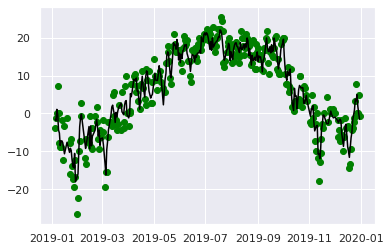

In [0]:
# TMIN Random Forest
# Make a plot of obs for the test period(dots)  and model predict for the test period  (line)
plt.scatter(testing_dates, testing_verification, c='green')
plt.plot(testing_dates, Predict, c='black')

### Linear Regression for **Max Wind Speed**

In [0]:
# The following will overwrite the above regressions
testing_dates = np.array(New_condensed_date_file.query('year == 2019')['Date'])
training_verification = np.array(Merge_File.query('year < 2019')['Max Wind Speed (m/s)'])
testing_verification = np.array(Merge_File.query('year == 2019')['Max Wind Speed (m/s)'])


In [0]:
lrwind = LinearRegression(fit_intercept=True)

column_names = ['WMAX','wspd'] # Choose the columns 
train_vars = Condense_file.query('year < 2019')[column_names] #  training
test_vars = Condense_file.query('year == 2019')[column_names] #  testing


lrwind.fit(train_vars, training_verification) # Fit the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
Predict=lrwind.predict(test_vars) 

#print the root mean square error, model slope, and model intercept
#checks the GFS forecast as base prediction
print('Baseline Root Mean Square Error:', round(sqrt(mean_squared_error(testing_verification, Condense_file.query('year == 2019')['WMAX'].values)), 2), 'm/s.')
print('Root Mean Square Error:', round(sqrt(mean_squared_error(testing_verification, Predict)), 2), 'm/s.')
print("Model slope:    ", lrwind.coef_[0])
print("Model intercept:", lrwind.intercept_)

Baseline Root Mean Square Error: 3.34 m/s.
Root Mean Square Error: 2.62 m/s.
Model slope:     0.47394511541951384
Model intercept: 3.075835480614166


Print out for Max Wind Speed:

Baseline Root Mean Square Error: 3.34 m/s.
Root Mean Square Error: 2.62 m/s.
Model slope:     0.47394511541951384
Model intercept: 3.075835480614166

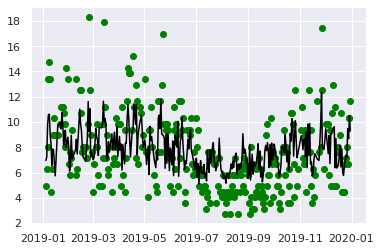

In [0]:
# Max wind speed - linear regression
# Make a plot of obs for the test period(dots)  and model predict for the test period  (line)
plt.scatter(testing_dates, testing_verification, c='green')
plt.plot(testing_dates, Predict, c='black')

### Random Forest Regression for **Max Wind Speed**

In [0]:
rf_WMAX = RandomForestRegressor()

rf_random_WMAX = RandomizedSearchCV(estimator = rf, cv=3, param_distributions = random_grid, n_iter = 100, verbose=2, random_state=42, n_jobs = -1)

rf_random_WMAX.fit(train_vars, training_verification)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 15.7min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [0]:
# Extract the best random forest model
best_random_WMAX = rf_random_WMAX.best_estimator_

# Predict the values
Predict = best_random_WMAX.predict(test_vars)

print('Baseline Root Mean Square Error:', round(sqrt(mean_squared_error(testing_verification, Condense_file.query('year == 2019')['WMAX'].values)), 2), 'm/s .')
print('Root Mean Square Error:', round(sqrt(mean_squared_error(testing_verification, Predict)), 2), 'm/s .')

Baseline Root Mean Square Error: 3.34 m/s .
Root Mean Square Error: 2.69 m/s .


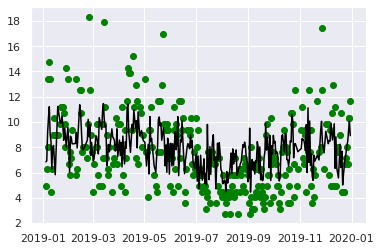

In [0]:
# Max wind speed - random forest regression
# Make a plot of obs for the test period(dots)  and model predict for the test period  (line)
plt.scatter(testing_dates, testing_verification, c='green')
plt.plot(testing_dates, Predict, c='black')

### Linear Regression of **Total Precip**

In [0]:
#Linear regression total precip
# The following will overrite the above regressions
testing_dates = np.array(New_condensed_date_file.query('year == 2019')['Date'])
training_verification = np.array(Merge_File.query('year < 2019')['Daily Precip (mm)'])
testing_verification = np.array(Merge_File.query('year == 2019')['Daily Precip (mm)'])
#testing_verification

In [0]:
lrprecip = LinearRegression(fit_intercept=True)

column_names = ['RTOT','dwpc','mslp','skct'] # Choose the columns we want to use in the regression!!!
train_vars = Condense_file.query('year < 2019')[column_names] # Get the columns for training
test_vars = Condense_file.query('year == 2019')[column_names] # Get the columns for testing


lrprecip.fit(train_vars, training_verification) # Fit the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
Predict=lrprecip.predict(test_vars) 

#print the root mean square error, model slope, and model intercept
#checks the GFS forecast as base prediction
print('Baseline Root Mean Square Error:', round(sqrt(mean_squared_error(testing_verification, Condense_file.query('year == 2019')['RTOT'].values)), 2), 'mm.')
print('Root Mean Square Error:', round(sqrt(mean_squared_error(testing_verification, Predict)), 2), 'mm.')
print("Model slope:    ", lrprecip.coef_[0])
print("Model intercept:", lrprecip.intercept_)

Baseline Root Mean Square Error: 8.58 mm.
Root Mean Square Error: 4.88 mm.
Model slope:     0.060139244605312586
Model intercept: -5.209994095045092


Print out for Precip:

Baseline Root Mean Square Error: 8.58 mm.
Root Mean Square Error: 4.88 mm.
Model slope:     0.060139244605312586
Model intercept: -5.209994095045092

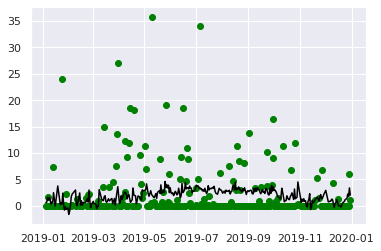

In [0]:
# Precip - Linear Regression
plt.scatter(testing_dates, testing_verification, c='green')
plt.plot(testing_dates, Predict, c='black')

### Random Forest Regression **Total Precip**

In [0]:
rf_PRECIP = RandomForestRegressor()

rf_random_PRECIP = RandomizedSearchCV(estimator = rf, cv=3, param_distributions = random_grid, n_iter = 100, verbose=2, random_state=42, n_jobs = -1)

rf_random_PRECIP.fit(train_vars, training_verification)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 23.2min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [0]:
# Extract the best random forest model
best_random_PRECIP = rf_random_PRECIP.best_estimator_

# Predict the values
Predict = best_random_PRECIP.predict(test_vars)

print('Baseline Root Mean Square Error:', round(sqrt(mean_squared_error(testing_verification, Condense_file.query('year == 2019')['RTOT'].values)), 2), 'mm .')
print('Root Mean Square Error:', round(sqrt(mean_squared_error(testing_verification, Predict)), 2), 'mm .')

Baseline Root Mean Square Error: 8.58 mm .
Root Mean Square Error: 4.89 mm .


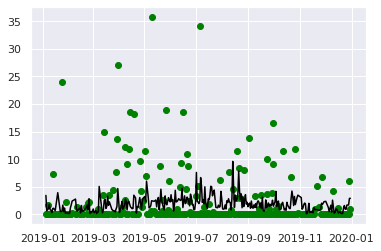

In [0]:
# Precip - Random Forest Regression
plt.scatter(testing_dates, testing_verification, c='green')
plt.plot(testing_dates, Predict, c='black')